## Exercise

In this exercise we are going to train a Linear regression model and observe the effect of basis functions on the model's performance.

For the implementation you can use sklearn. Sklean (full name: scikit-learn) provides a toolbox for training ML models including preprocessing and evaluation. In this tutorial we will use the following:

#### PolynomialFeatures (found in sklearn.preprocessing)

PolynomialFeatures extends vectors using polynomial basis functions. In order to apply the extension you can call the <code>fit(x)</code> function. The degree of the polynomial basis functions can be set in the constructor <code>PolynomialFeatures(degree=degree, include_bias=False)</code>

#### mean_squared_error (found in sklearn.metrics)
A convenience function to compute the mean squared error of the true labels <code>y_true</code> and the model's prediction <code>y_pred</code>

#### LinearRegression (found in sklearn.linear_model)
The Linear Regression algorithm. Just as PolynomialFeatures it has a <code>fit(x, y)</code> function. After training (fitting) the model can be applied to new data using <code>predict(x)</code>.

#### Pipeline (found in sklearn.pipeline)
Using Pipelines you can chain different processing steps of your ML workflow. You can for example preprocess your data and directly forward that preprocessed data to a ML algorithm. You need to call <code>fit(x, y)<code> only once the the whole Pipeline object.

1. Implement a linear regression using sklearn
    1. Create yourself a toy dataset consisting of datapoints randomly distributed around a parabola
    2. Build a pipeline consisting of a PolynomialFeatures preprocessing step and a LinearRegression model
    3. Fit the pipeline on your toy dataset
    4. Plot your dataset in a scatter plot along with your model's prediction over the whole plot range
2. Make up your mind about the following:
    1. Try different values of <code>degree</code>. How do changes in <code>degree</code> affect the performance?
    2. Does degree have an effect on the model's complexity?
    3. What do we need to do in order to train models with higher complexity while avoiding the observed effects?

## Solution

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# you can play around with these and see the effect
nb_samples = 100
noise_std = 0.2

# let's have a look at data distributed around a parabola
def true_values(x):
    return x**2

# create a noisy dataset around the true distribution
x = np.linspace(-5, 5, nb_samples)
y = true_values(x) + np.random.normal(0, 3, nb_samples)
x += np.random.normal(0, noise_std, nb_samples)
y += np.random.normal(0, noise_std, nb_samples)
x = x.reshape(-1, 1) # to get a 2d vector of (nb_samples, nb_features)

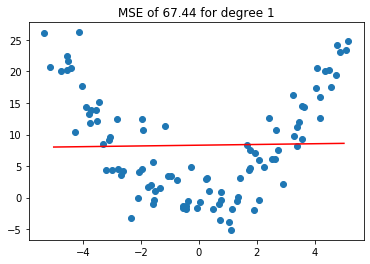

In [3]:
degree = 1

polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linreg = LinearRegression(fit_intercept=True)
pipeline = Pipeline([("preprocessing",polynomial_features), ("model", linreg)])

# fit the model to the data
pipeline.fit(x, y)

# get the mean squared error
mse = mean_squared_error(y, pipeline.predict(x))

# the new model
whole_x = np.linspace(-5, 5, 100).reshape(-1, 1)
model = pipeline.predict(whole_x)

plt.scatter(x, y)
plt.plot(whole_x, model, color='r')
plt.title('MSE of %.2f for degree %d' % (mse, degree))
plt.show()
